<a href="https://colab.research.google.com/github/alihussainia/Diamond-Price-Prediction-App/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations and Configurations

In [ ]:
!pip install pycaret

In [3]:
# to display interactive viz
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Dataset

For this tutorial we will use a dataset based on a case study called **"Sarah Gets a Diamond"**. This case was presented in the first year decision analysis course at Darden School of Business (University of Virginia). The basis for the data is a case regarding a hopeless romantic MBA student choosing the right diamond for his bride-to-be, Sarah. The data contains 6000 records for training. Short descriptions of each column are as follows:

- ID: Uniquely identifies each observation (diamond)
- Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip
- Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)
- Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)
- Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)
- Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities
- Price: The amount in USD that the diamond is valued Target Column

**Dataset Acknowledgement:**
This case was prepared by Greg Mills (MBA ’07) under the supervision of Phillip E. Pfeifer, Alumni Research Professor of Business Administration. Copyright (c) 2007 by the University of Virginia Darden School Foundation, Charlottesville, VA. All rights reserved.

The original dataset and description can be [found here]("https://github.com/DardenDSC/sarah-gets-a-diamond).

In [4]:
# Importing Dataset
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [5]:
#check the shape of data
dataset.shape

(6000, 8)

In [6]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


# Setting-up Environment

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [7]:
# Setting-up Environment
from pycaret.regression import *

In [8]:
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


# Comparing Models

In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.620118e+02,2.763999e+06,1.612241e+03,9.729000e-01,0.0817,0.0607,1.098
rf,Random Forest Regressor,7.606304e+02,2.929683e+06,1.663015e+03,9.714000e-01,0.0818,0.0597,1.005
lightgbm,Light Gradient Boosting Machine,7.526446e+02,3.056348e+06,1.687991e+03,9.711000e-01,0.0773,0.0567,0.095
gbr,Gradient Boosting Regressor,9.200795e+02,3.763129e+06,1.900843e+03,9.633000e-01,0.1024,0.0770,0.207
dt,Decision Tree Regressor,1.003124e+03,5.305620e+06,2.228727e+03,9.476000e-01,0.1083,0.0775,0.023
ridge,Ridge Regression,2.413570e+03,1.412050e+07,3.726166e+03,8.621000e-01,0.6689,0.2875,0.012
lasso,Lasso Regression,2.412192e+03,1.424680e+07,3.744231e+03,8.608000e-01,0.6767,0.2866,0.031
llar,Lasso Least Angle Regression,2.355615e+03,1.427202e+07,3.745309e+03,8.607000e-01,0.6391,0.2728,0.014
br,Bayesian Ridge,2.415803e+03,1.427077e+07,3.746995e+03,8.606000e-01,0.6696,0.2873,0.017
lr,Linear Regression,2.418704e+03,1.427937e+07,3.748958e+03,8.604000e-01,0.6690,0.2879,0.222


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

# Creating a Model

In [10]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,685.4484,1.227464e+06,1107.9100,0.9865,0.0793,0.0599
1,799.8848,4.710627e+06,2170.3978,0.9639,0.0775,0.0568
2,733.2349,1.701776e+06,1304.5215,0.9844,0.0754,0.0582
3,748.2089,1.577962e+06,1256.1697,0.9826,0.0765,0.0589
4,741.7261,3.810655e+06,1952.0898,0.9525,0.0884,0.0614
5,867.6636,5.364843e+06,2316.2131,0.9542,0.0893,0.0628
6,719.1019,2.587279e+06,1608.5021,0.9757,0.0751,0.0554
7,722.4955,1.818604e+06,1348.5562,0.9770,0.0787,0.0599
8,740.6120,2.304722e+06,1518.1309,0.9774,0.0796,0.0582
9,847.9284,4.192900e+06,2047.6571,0.9601,0.0977,0.0657


In [11]:
#trained model object is stored in the variable 'dt'. 
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# Tuning the Model

When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the `tune_model()` function is used. 

In [13]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,816.9083,1.872561e+06,1368.4154,0.9794,0.0970,0.0726
1,951.0910,6.584278e+06,2565.9848,0.9495,0.0940,0.0706
2,909.3077,3.013278e+06,1735.8795,0.9724,0.0954,0.0737
3,907.8589,2.464009e+06,1569.7161,0.9728,0.0971,0.0733
4,906.9244,3.560152e+06,1886.8365,0.9556,0.1064,0.0777
5,1081.5682,7.990185e+06,2826.6915,0.9318,0.1075,0.0787
6,930.3239,3.946251e+06,1986.5174,0.9629,0.0969,0.0731
7,960.7591,3.651064e+06,1910.7756,0.9538,0.1050,0.0795
8,1003.5076,4.133160e+06,2033.0174,0.9594,0.1078,0.0804
9,998.3897,4.729012e+06,2174.6292,0.9550,0.1138,0.0812


# Prediction Error Plot

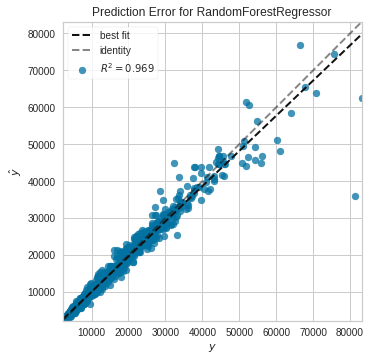

In [14]:
plot_model(rf, plot = 'error')

# Feature Importance Plot

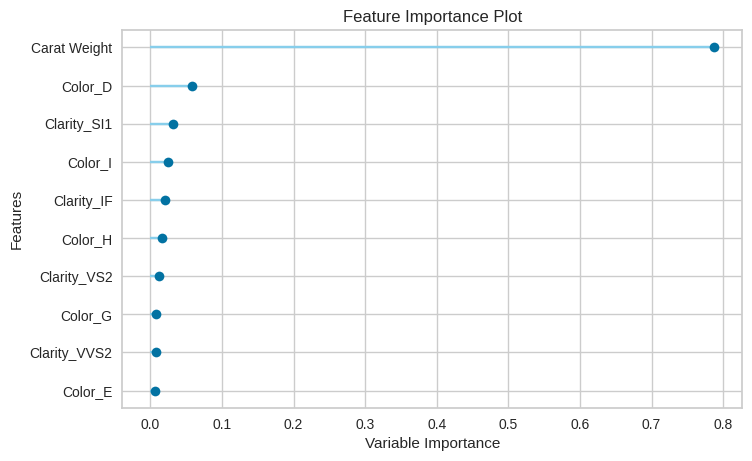

In [17]:
plot_model(rf, plot='feature')

# Predicting on Test Sample (30%)

In [18]:
predict_model(rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,750.8489,3.391477e+06,1841.5962,0.9691,0.0775,0.0572


# Finalizing Model for Deployment

The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.



In [19]:
rf = finalize_model(rf)

In [20]:
#Final Random Forest parameters for deployment
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# Predict on unseen data

- 10% of the Dataset

In [22]:
unseen_predictions = predict_model(rf, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,11225.518000
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,16218.635833
2,1.51,Good,F,SI1,VG,G,GIA,10429,10569.137667
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4593.048333
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4237.479291


# Saving the model

In [23]:
save_model(rf, model_name = 'rf')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
                             